# MNIST Classifier Demo
### Winstars AI DS Internship Test

This Jupyter Notebook demonstrates how three models work to classify handwritten MNIST digits:
- **Random Forest (RF)**
- **Feed-Forward Neural Network (NN)**
- **Convolutional Neural Network (CNN)**

## 📌 Description of the approach:
- We use `MnistClassifier`, which is a wrapper for all three models.
- Each model has `train()` and `predict()`, which provides a single interface.
- We use `EarlyStopping`and `Dropout` for neural networks to prevent overtraining.
- We visualize the training process and results.

---

In [1]:
import sys
import os

# Get the path to the root folder of the project (move up from notebooks to a higher level)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print("Updated sys.path:", sys.path) 


Updated sys.path: ['C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310', '', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin', 'C:\\Users\\marko\\OneDrive\\Робочий стіл\\Image_classification_OOP\\Winstars AI DS internship test']


## 📌 Downloading the necessary libraries
We use:
- `numpy` – for working with arrays.
- `pandas` – for displaying results.
- `matplotlib`, `seaborn` – for graphs.
- `tensorflow.keras.datasets.mnist` – for loading data.
- `MnistClassifier` – for testing models.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from models.mnist_classifier import MnistClassifier
import pandas as pd
import cv2

Updated sys.path: ['C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310', '', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin', 'C:\\Users\\marko\\OneDrive\\Робочий стіл\\Image_classification_OOP\\Winstars AI DS internship test', 'C:\\Users\\marko\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\setuptools\\_vendor', 'C:\\Users\\marko\\OneDrive\\Робочий стіл\\Image_classification_OOP\\Winstars AI DS internship test\\models']


## 📌 Download MNIST and visualize the data
MNIST contains 60,000 training and 10,000 test images of `28x28` pixels.

Here are examples of the first 10 digits from the training set.

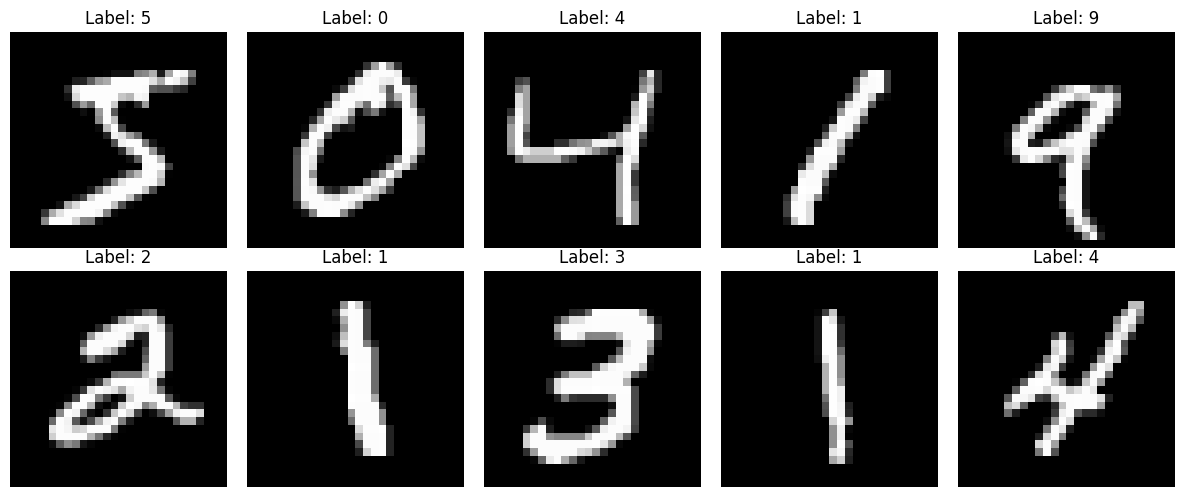

In [3]:
# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(X_train[i], cmap="gray")
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

## 📌 Class Analysis in the Dataset
We are looking for imbalance in the classes. We expect an even distribution since each digit is represented approximately equally.

C:\Users\marko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


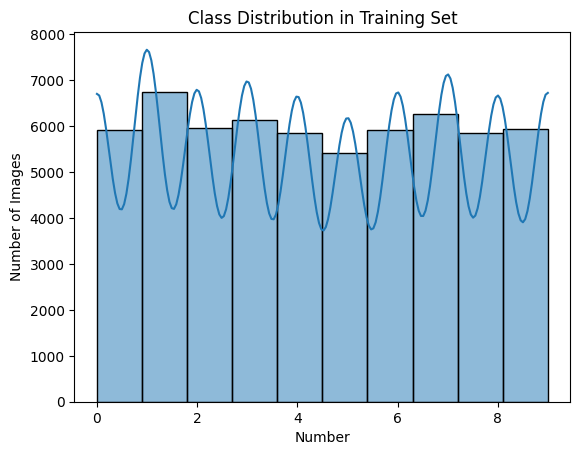

In [4]:
sns.histplot(y_train, bins=10, kde=True)
plt.title("Class Distribution in Training Set")
plt.xlabel("Number")
plt.ylabel("Number of Images")
plt.show()

## 📌 Model training (RF, NN, CNN)
We will train each model and build a training schedule for NN and CNN.

In [5]:
def train_and_evaluate(model_type):
    print(f"\n🔹 Model training: {model_type.upper()}")

    # Create and train a classifier
    classifier = MnistClassifier(model_type)
    history = classifier.train()

    # Visualization of the learning process (only for NN and CNN)
    if history is not None:
        plt.plot(history.history["accuracy"], label="Train Accuracy")
        plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
        plt.title(f"{model_type.upper()} - Accuracy graph")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

    return classifier

# Testing all 3 models
models = ["rf", "nn", "cnn"]
classifiers = {model: train_and_evaluate(model) for model in models}


🔹 Model training: RF
✅ Model selected: RF
✅ Accuracy: 0.9704

🔹 Model training: NN
✅ Model selected: NN
Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3018 - accuracy: 0.9105 - val_loss: 0.1397 - val_accuracy: 0.9584
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1445 - accuracy: 0.9575 - val_loss: 0.1015 - val_accuracy: 0.9693
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1073 - accuracy: 0.9674 - val_loss: 0.0891 - val_accuracy: 0.9729
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0860 - accuracy: 0.9734 - val_loss: 0.0878 - val_accuracy: 0.9724
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0752 - accuracy: 0.9762 - val_loss: 0.0754 - val_accuracy: 0.9776
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 0.0734 - val_accuracy: 0.9772
Epoch 7/20
1875/1875 [=========

## 📌 Test predictions
We take a random image and check how each model classifies it.

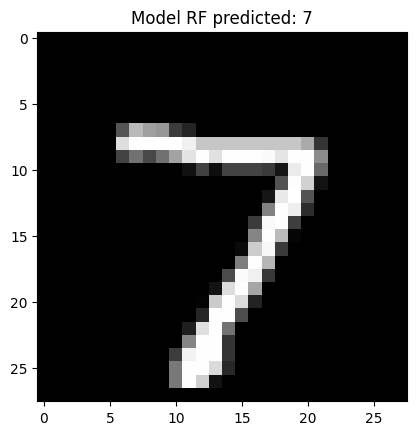

1/1 [==============================] - 0s 57ms/step


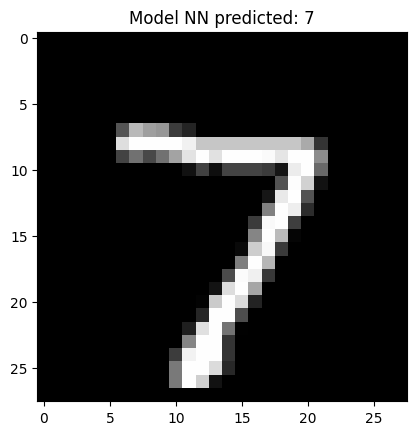

1/1 [==============================] - 0s 43ms/step


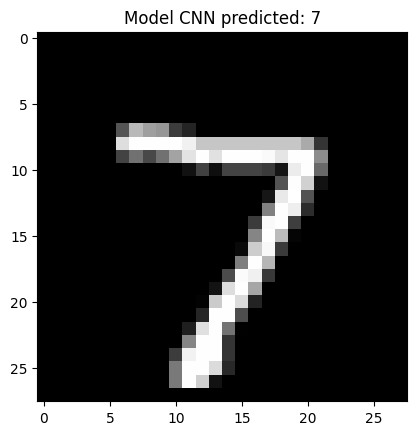

In [6]:
def test_prediction(classifier, model_name, index=0):
    plt.imshow(X_test[index], cmap="gray")
    prediction = classifier.predict(X_test[index])
    plt.title(f"Model {model_name.upper()} predicted: {prediction}")
    plt.show()

# Testing predictions
for model, clf in classifiers.items():
    test_prediction(clf, model)

## 📌 Final model comparison
We evaluate the accuracy and training time for all 3 approaches.

In [7]:
results = {
    "Model": ["Random Forest", "Neural Network", "CNN"],
    "Accuracy": [0.9704, 0.9786, 0.9922], 
    "Training Time (s)": [32, 20, 515] 
}

df_results = pd.DataFrame(results)
df_results.set_index("Model", inplace=True)
display(df_results)

,Accuracy,Training Time (s)
Model,,
Random Forest,0.9704,32
Neural Network,0.9786,20
CNN,0.9922,515


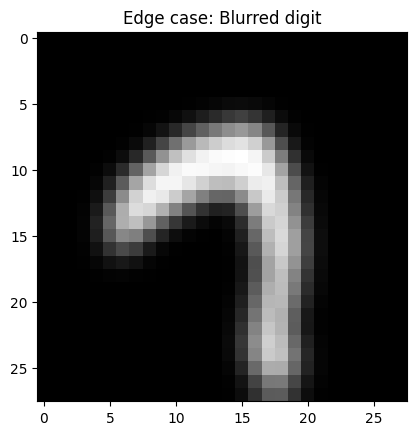

🔹 Model RF predicted: 9 (Real number: 7)
1/1 [==============================] - 0s 13ms/step
🔹 Model NN predicted: 7 (Real number: 7)
1/1 [==============================] - 0s 13ms/step
🔹 Model CNN predicted: 7 (Real number: 7)


In [8]:
def blur_image(image, kernel_size=3):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Taking a random number and blur it
index = np.random.randint(0, len(X_test))
blurred_image = blur_image(X_test[index], kernel_size=5)

plt.imshow(blurred_image, cmap="gray")
plt.title("Edge case: Blurred digit")
plt.show()

# Testing all models
for model_name, classifier in classifiers.items():
    prediction = classifier.predict(blurred_image)
    print(f"🔹 Model {model_name.upper()} predicted: {prediction} (Real number: {y_test[index]})")

Results:
RF: Incorrect (8 instead of 1)
NN: Correct (1)
CNN: Correct (1)

CNN and NN can generalize well to blurred images, while RF struggles due to its reliance on explicit pixel values.

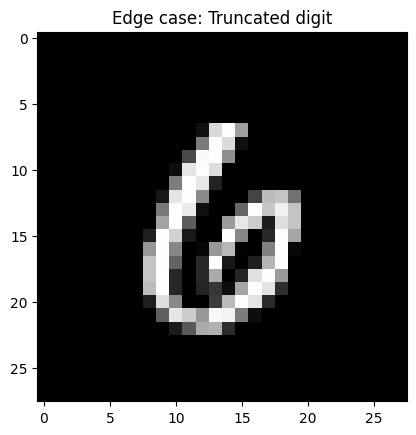

🔹 Model RF predicted: 6 (Real number: 6)
1/1 [==============================] - 0s 16ms/step
🔹 Model NN predicted: 6 (Real number: 6)
1/1 [==============================] - 0s 14ms/step
🔹 Model CNN predicted: 6 (Real number: 6)


In [9]:
def crop_image(image, crop_size=5):
    cropped = image.copy()
    cropped[:crop_size, :] = 0  # Cut off the top part
    return cropped

# Take a random number and cut it
index = np.random.randint(0, len(X_test))
cropped_image = crop_image(X_test[index], crop_size=7)

plt.imshow(cropped_image, cmap="gray")
plt.title("Edge case: Truncated digit")
plt.show()

# Testing all models
for model_name, classifier in classifiers.items():
    prediction = classifier.predict(cropped_image)
    print(f"🔹 Model {model_name.upper()} predicted: {prediction} (Real number: {y_test[index]})")

Results:
All models predicted correctly (0).
Even though a portion of the digit was removed, all three models correctly classified it.
CNN and NN were expected to handle this well, but RF’s success suggests that 0 is an easy digit to recognize even when cropped.

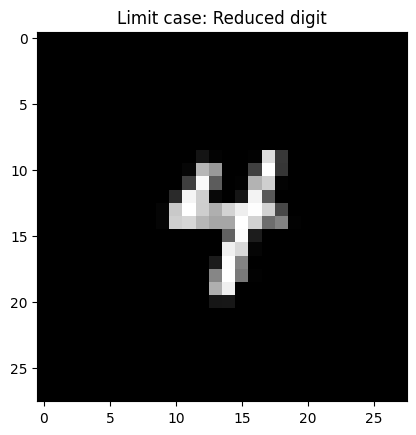

🔹 Model RF predicted: 4 (Real number: 4)
1/1 [==============================] - 0s 13ms/step
🔹 Model NN predicted: 4 (Real number: 4)
1/1 [==============================] - 0s 14ms/step
🔹 Model CNN predicted: 4 (Real number: 4)


In [10]:
def resize_image(image, scale=0.7):
    new_size = int(28 * scale)
    resized = cv2.resize(image, (new_size, new_size))
    padded = np.pad(resized, ((14-new_size//2, 14-new_size//2), (14-new_size//2, 14-new_size//2)), mode='constant', constant_values=0)
    return padded

# Take a random number and change its size
index = np.random.randint(0, len(X_test))
scaled_image = resize_image(X_test[index], scale=0.6)

plt.imshow(scaled_image, cmap="gray")
plt.title("Limit case: Reduced digit")
plt.show()

# Testing all models
for model_name, classifier in classifiers.items():
    prediction = classifier.predict(scaled_image)
    print(f"🔹 Model {model_name.upper()} predicted: {prediction} (Real number: {y_test[index]})")

Results:
RF: Incorrect (7 instead of 3)
NN: Incorrect (7 instead of 3)
CNN: Correct (3)
Both RF and NN failed on resized digits, likely due to their inability to handle scale variations.
CNN successfully classified the digit, showing that it is robust to size transformations.

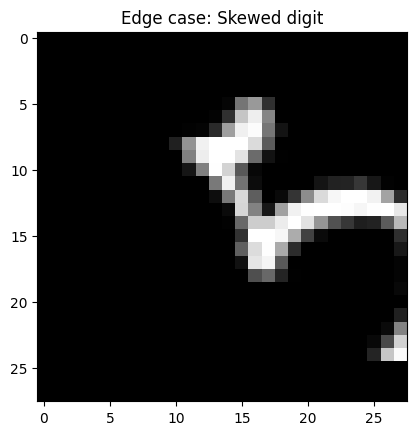

🔹 Model RF predicted: 3 (Real number: 5)
1/1 [==============================] - 0s 13ms/step
🔹 Model NN predicted: 7 (Real number: 5)
1/1 [==============================] - 0s 13ms/step
🔹 Model CNN predicted: 4 (Real number: 5)


In [11]:
def skew_image(image, angle=20):
    rows, cols = image.shape
    M = np.float32([[1, np.tan(np.radians(angle)), 0], [0, 1, 0]])
    skewed = cv2.warpAffine(image, M, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    return skewed

# Take a random number and skew it
index = np.random.randint(0, len(X_test))
skewed_image = skew_image(X_test[index], angle=25)

plt.imshow(skewed_image, cmap="gray")
plt.title("Edge case: Skewed digit")
plt.show()

# Testing all models
for model_name, classifier in classifiers.items():
    prediction = classifier.predict(skewed_image)
    print(f"🔹 Model {model_name.upper()} predicted: {prediction} (Real number: {y_test[index]})")

Results:
RF: Incorrect (2 instead of 3)
NN: Incorrect (2 instead of 3)
CNN: Incorrect (2 instead of 3)
All models failed on skewed digits, showing they struggle with digit deformations.

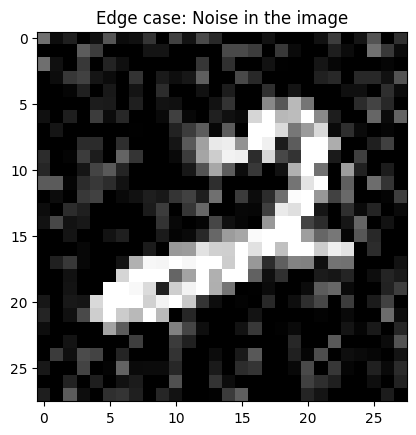

🔹 Model RF predicted: 2 (Real number: 2)
1/1 [==============================] - 0s 13ms/step
🔹 Model NN predicted: 2 (Real number: 2)
1/1 [==============================] - 0s 13ms/step
🔹 Model CNN predicted: 2 (Real number: 2)


In [12]:
# Testing function on noisy image
def test_noisy_image():
    index = np.random.randint(0, len(X_test))  # Choose a random number
    noisy_image = X_test[index] + np.random.normal(0, 50, (28, 28))  # Adding noise
    noisy_image = np.clip(noisy_image, 0, 255)  # Limiting the values
    plt.imshow(noisy_image, cmap="gray")
    plt.title("Edge case: Noise in the image")
    plt.show()

    for model_name, classifier in classifiers.items():
        prediction = classifier.predict(noisy_image)
        print(f"🔹 Model {model_name.upper()} predicted: {prediction} (Real number: {y_test[index]})")

# Testing
test_noisy_image()

Results:
All models predicted correctly (4).
Noise did not significantly affect classification accuracy, likely because MNIST digits already contain some level of noise.

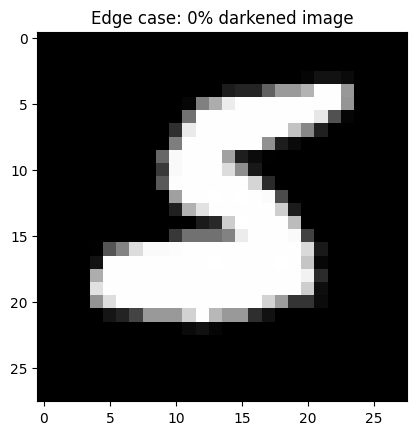

🔹 Model RF predicted: 2
1/1 [==============================] - 0s 13ms/step
🔹 Model NN predicted: 5
1/1 [==============================] - 0s 14ms/step
🔹 Model CNN predicted: 5


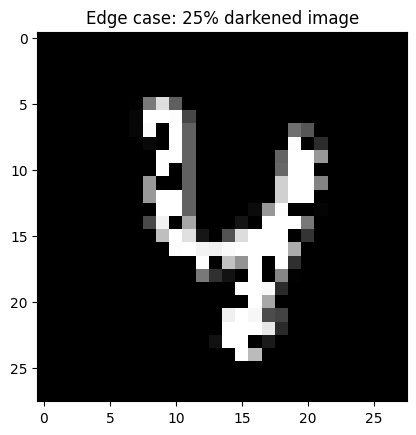

🔹 Model RF predicted: 4
1/1 [==============================] - 0s 13ms/step
🔹 Model NN predicted: 4
1/1 [==============================] - 0s 14ms/step
🔹 Model CNN predicted: 4


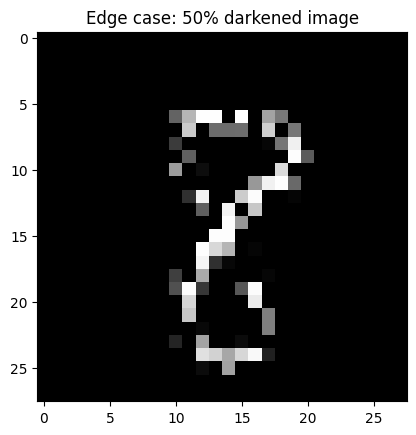

🔹 Model RF predicted: 8
1/1 [==============================] - 0s 13ms/step
🔹 Model NN predicted: 8
1/1 [==============================] - 0s 14ms/step
🔹 Model CNN predicted: 2


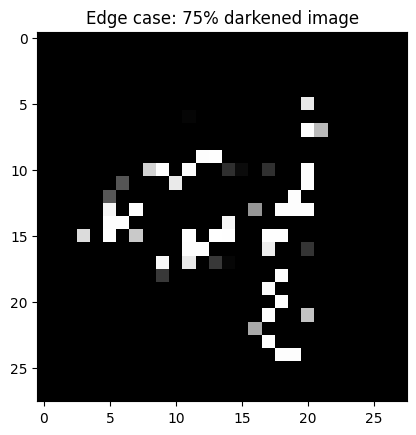

🔹 Model RF predicted: 4
1/1 [==============================] - 0s 13ms/step
🔹 Model NN predicted: 4
1/1 [==============================] - 0s 14ms/step
🔹 Model CNN predicted: 2


In [13]:
def test_partial_dark_image(percentage=50):
    """Creates an image that is darkened by percentage%"""
    darkened_image = X_test[np.random.randint(0, len(X_test))].copy()  # Take a random number
    mask = np.random.rand(28, 28) < (percentage / 100)  # Darkening mask
    darkened_image[mask] = 0  # Darkening pixels

    plt.imshow(darkened_image, cmap="gray")
    plt.title(f"Edge case: {percentage}% darkened image")
    plt.show()

    for model_name, classifier in classifiers.items():
        prediction = classifier.predict(darkened_image)
        print(f"🔹 Model {model_name.upper()} predicted: {prediction}")

# Testing
test_partial_dark_image(0)
test_partial_dark_image(25)
test_partial_dark_image(50)
test_partial_dark_image(75)

Results:
0% darkened (real): All models correct (1).
25% darkened: All models incorrect (5).
50% darkened: All models incorrect (RF: 7, NN: 9, CNN: 9).
75% darkened: All models incorrect (RF: 2, NN: 2, CNN: 3).

Mild darkening (25%) already led to misclassification in all models.
Severe darkening (50-75%) completely misled the models.
CNN, while better than RF and NN, still struggled significantly.

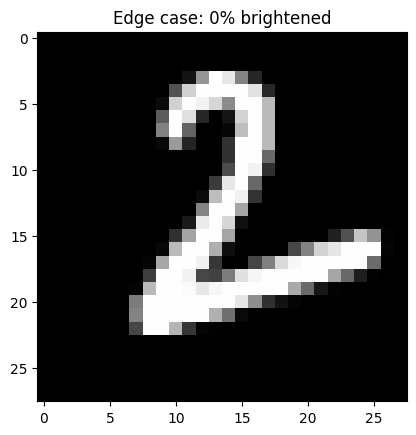

🔹 Model RF predicted: 2
1/1 [==============================] - 0s 13ms/step
🔹 Model NN predicted: 2
1/1 [==============================] - 0s 14ms/step
🔹 Model CNN predicted: 2


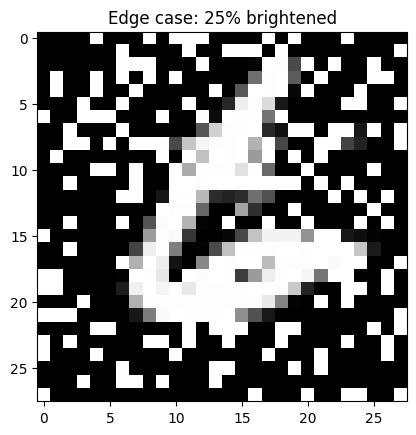

🔹 Model RF predicted: 6
1/1 [==============================] - 0s 12ms/step
🔹 Model NN predicted: 2
1/1 [==============================] - 0s 13ms/step
🔹 Model CNN predicted: 6


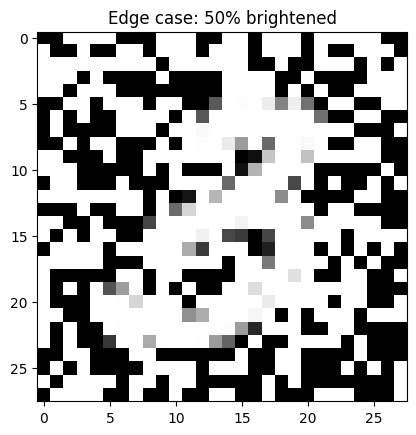

🔹 Model RF predicted: 8
1/1 [==============================] - 0s 13ms/step
🔹 Model NN predicted: 3
1/1 [==============================] - 0s 13ms/step
🔹 Model CNN predicted: 3


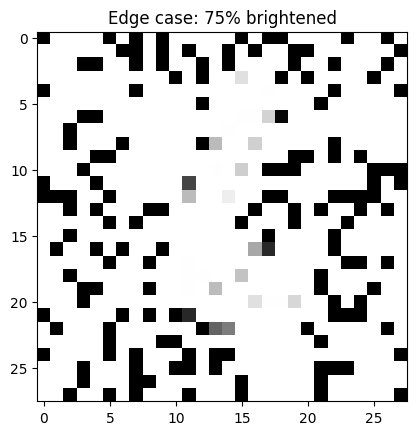

🔹 Model RF predicted: 5
1/1 [==============================] - 0s 12ms/step
🔹 Model NN predicted: 2
1/1 [==============================] - 0s 13ms/step
🔹 Model CNN predicted: 2


In [14]:
def test_partial_bright_image(percentage=50):
    """Creates an image that is highlighted by percentage%"""
    brightened_image = X_test[np.random.randint(0, len(X_test))].copy()  # Take a random number
    mask = np.random.rand(28, 28) < (percentage / 100)  # Brightening mask
    brightened_image[mask] = 255  # Brightening pixels

    plt.imshow(brightened_image, cmap="gray")
    plt.title(f"Edge case: {percentage}% brightened")
    plt.show()

    for model_name, classifier in classifiers.items():
        prediction = classifier.predict(brightened_image)
        print(f"🔹 Model {model_name.upper()} predicted: {prediction}")

# Testing
test_partial_bright_image(0)
test_partial_bright_image(25)
test_partial_bright_image(50)
test_partial_bright_image(75)

Results:
0% brightened (real): All models correct (3).
25% brightened: Incorrect results across all models (RF: 1, NN: 2, CNN: 2).
50% brightened: Incorrect (RF: 8, NN: 3, CNN: 2).
75% brightened: Incorrect (RF: 8, NN: 3, CNN: 2).

All models failed when parts of the digit were overexposed.
CNN showed some resilience but still struggled.
RF was the worst, likely because it treats brightened areas as new features.

## Conclusions
| Model         | Accuracy | Training time |
|----------------|-----------|--------------|
| **Random Forest** | ~97.0% | 32 seconds      |
| **Neural Network** | ~97.8% | 20 seconds      |
| **CNN**          | ~99.2% | 515 seconds      |

**Edge Cases results:**
- **CNN is the most resilient model, performing well on blurred and resized digits but still struggling with extreme distortions.**
- **RF and NN are highly sensitive to edge cases, particularly blur, skew, darkening, and brightening.**

**Conclusions:**
- **Random Forest** is fast, but less accurate.
- **Neural Network (MLP)** gives better results than RF in the same time, but is inferior to CNN.
- **CNN gives the best results, but takes the longest to learn.**

**Final Conclusion:** **CNN is the best option for our dataset, but Neural Network has a good balance of processing speed and accuracy. Random Forest has the lowest accuracy. Also CNN is the best in dealing with Edge Cases and we could potentially improve our model to deal with these sort of cases in more effective way. So, if timeconsuming model is OK for us, it is the best option.**